# EASC6510 Trace element geochemistry

## Problem set 1 

Yip, Cheuk Yin (Ivan) 202288531

3 March 2023

This Jupyter Notebook is used for data visualisation of multi-element analysis.

In [1]:
import numpy as np 
import pandas as pd
import pyrolite
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pandas.api.types import CategoricalDtype

# read in files
BHVO2 = pd.read_excel(r"PS1-Part1.xlsx", sheet_name="BHVO-2") # I transposed the data structure for better use in pandas
Jochum = pd.read_excel(r"PS1-Part1.xlsx", sheet_name="Jochum (2016)",index_col="Element")

# generate an ID for each digestions
BHVO2['Code'] = BHVO2[["Company", "Digestion", 'Analysis']].astype(
    str).agg('-'.join, axis=1)

# split dataframe by company
BHVO2_DWL = BHVO2[BHVO2["Company"] == "DWL"]
BHVO2_KML = BHVO2[BHVO2["Company"] == "KML"]

# lists of elements parsed by pyrolite
elements = [el for el in BHVO2_KML.columns if el in pyrolite.geochem.parse.common_elements()]


In [2]:
# Part 1 Task 1: Precision by Company and digestion
## define statistic functions
def mean(x):
    return np.mean(x)

def std_s(x): 
    return np.std(x,ddof=1)

def CV_perc(x):
    return 100*std_s(x)/mean(x)

def rsd_2(x):
    return 2*CV_perc(x)

def CI_95_low(x):
    return mean(x) - 2*std_s(x)

def CI_95_up(x):
    return mean(x) + 2*std_s(x)

def CI_95(x):
    return "[{low}, {up}]".format(low=round(CI_95_low(x),2),up=round(CI_95_up(x),2))

def quality(df):
    quality_bins = [0, 3, 7, 10, 9999]
    quality_cat = ["excellent", "very good", "good", "poor"]
    df["Conc","Quality"] = pd.cut(abs(df.Conc.CV_perc),quality_bins, labels=quality_cat)
    return df

## decompose the data table
BHVO2_melt = BHVO2.drop("Code", axis=1).melt(id_vars=["Company","Digestion","Analysis"],var_name="Element",value_name="Conc")
elements_order = CategoricalDtype(list(BHVO2_melt["Element"].unique()),ordered=True)
BHVO2_melt["Element"] = BHVO2_melt["Element"].astype(elements_order)
display(BHVO2_melt)

## Calculate statistics
agg_func_stats = {'Conc': [np.mean, std_s, CV_perc, rsd_2, CI_95]}

BHVO2_melt_company_stat = BHVO2_melt.groupby(["Company","Element"],sort=False).\
                                             agg(agg_func_stats).\
                                             round(2).sort_values(["Company","Element"])
BHVO2_melt_company_stat = quality(BHVO2_melt_company_stat)
display(BHVO2_melt_company_stat)

BHVO2_melt_digestion_stat = BHVO2_melt.groupby(["Company","Digestion","Element"],sort=False).\
                                               agg(agg_func_stats).\
                                               round(2).sort_values(["Company","Digestion"])
BHVO2_melt_digestion_stat = quality(BHVO2_melt_digestion_stat)
display(BHVO2_melt_digestion_stat)

,Company,Digestion,Analysis,Element,Conc
0,DWL,D1,1,Li,4446.000000
1,DWL,D1,2,Li,4549.431098
2,DWL,D1,3,Li,4511.140697
3,DWL,D1,4,Li,4425.537762
4,DWL,D1,5,Li,4391.638443
...,...,...,...,...,...
2547,KML,D2,12,U,425.386631
2548,KML,D3,1,U,422.496298
2549,KML,D3,2,U,420.069075
2550,KML,D3,3,U,418.273338


Conc                            \
                        mean      std_s CV_perc  rsd_2   
Company Element                                          
DWL     Li           4488.35      64.31    1.43   2.87   
        Be            998.12      40.06    4.01   8.03   
        Sc          32357.26     336.86    1.04   2.08   
        Ti       16389996.30  533082.12    3.25   6.50   
        V          319531.14    7515.86    2.35   4.70   
...                      ...        ...     ...    ...   
KML     W             193.64       6.62    3.42   6.84   
        Tl             19.66       1.62    8.22  16.43   
        Pb           1548.63      94.46    6.10  12.20   
        Th           1188.52       8.88    0.75   1.49   
        U             423.62       2.65    0.63   1.25   

                                                        
                                      CI_95    Quality  
Company Element                                         
DWL     Li               [4359.73, 4616.96]  excellent  
        Be                 [918.0, 1078.24]  very good  
        Sc             [31683.54, 33030.98]  excellent  
        Ti       [15323832.06, 17456160.54]  very good  
        V            [304499.41, 334562.86]  excellent  
...                                     ...        ...  
KML     W                   [180.4, 206.88]  very good  
        Tl                   [16.43, 22.89]       good  
        Pb               [1359.71, 1737.55]  very good  
        Th               [1170.77, 1206.27]  excellent  
        U                  [418.32, 428.91]  excellent  

[88 rows x 6 columns]

Conc                            \
                                  mean      std_s CV_perc  rsd_2   
Company Digestion Element                                          
DWL     D1        Li           4458.60      53.81    1.21   2.41   
                  Be           1006.77      63.61    6.32  12.64   
                  Sc          32209.69     215.98    0.67   1.34   
                  Ti       15899543.24  212865.23    1.34   2.68   
                  V          320042.70    8941.03    2.79   5.59   
...                                ...        ...     ...    ...   
KML     D3        W             194.14      11.33    5.84  11.67   
                  Tl             19.82       0.60    3.01   6.02   
                  Pb           1606.29       9.71    0.60   1.21   
                  Th           1179.49       8.15    0.69   1.38   
                  U             420.52       1.79    0.43   0.85   

                                                                  
                                                CI_95    Quality  
Company Digestion Element                                         
DWL     D1        Li               [4350.97, 4566.22]  excellent  
                  Be                 [879.55, 1134.0]  very good  
                  Sc             [31777.73, 32641.66]  excellent  
                  Ti       [15473812.78, 16325273.69]  excellent  
                  V            [302160.65, 337924.75]  excellent  
...                                               ...        ...  
KML     D3        W                   [171.47, 216.8]  very good  
                  Tl                   [18.63, 21.02]  very good  
                  Pb                [1586.88, 1625.7]  excellent  
                  Th                [1163.19, 1195.8]  excellent  
                  U                   [416.93, 424.1]  excellent  

[264 rows x 6 columns]

Conc                            \
                        mean      std_s CV_perc  rsd_2   
Company Element                                          
DWL     Li           4488.35      64.31    1.43   2.87   
        Be            998.12      40.06    4.01   8.03   
        Sc          32357.26     336.86    1.04   2.08   
        Ti       16389996.30  533082.12    3.25   6.50   
        V          319531.14    7515.86    2.35   4.70   
...                      ...        ...     ...    ...   
KML     W             193.64       6.62    3.42   6.84   
        Tl             19.66       1.62    8.22  16.43   
        Pb           1548.63      94.46    6.10  12.20   
        Th           1188.52       8.88    0.75   1.49   
        U             423.62       2.65    0.63   1.25   

                                                                    
                                      CI_95    Quality Bias_Jochum  
Company Element                                                     
DWL     Li               [4359.73, 4616.96]  excellent       -0.26  
        Be                 [918.0, 1078.24]  very good       -7.24  
        Sc             [31683.54, 33030.98]  excellent        1.66  
        Ti       [15323832.06, 17456160.54]  very good        0.12  
        V            [304499.41, 334562.86]  excellent        0.42  
...                                     ...        ...         ...  
KML     W                   [180.4, 206.88]  very good      -22.85  
        Tl                   [16.43, 22.89]       good      -12.23  
        Pb               [1359.71, 1737.55]  very good       -6.31  
        Th               [1170.77, 1206.27]  excellent       -2.90  
        U                  [418.32, 428.91]  excellent        2.82  

[88 rows x 7 columns]

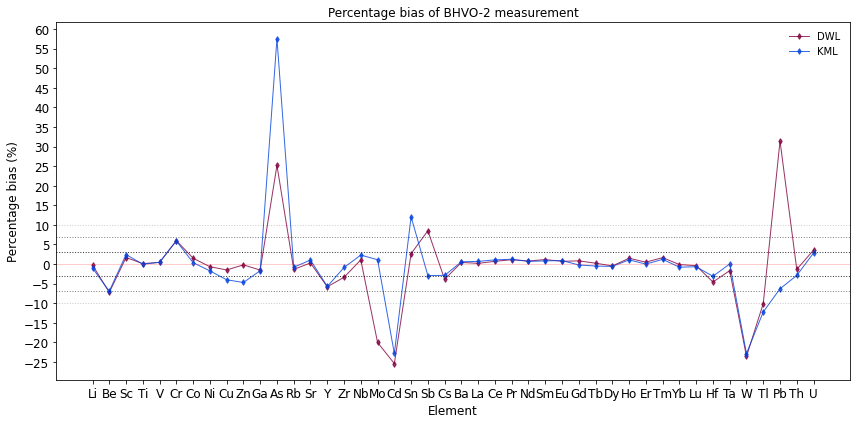

In [3]:
#Part 1 Task 2: Percentage Bias

# calculate percentage bias of DWL and KML
BHVO2_melt_company_stat["Conc","Bias_Jochum"] = (100*(BHVO2_melt_company_stat["Conc", "mean"] - Jochum["Measurement"])/Jochum["Measurement"]).round(2)
display(BHVO2_melt_company_stat)

# plot line plots
plt.figure(figsize=(12,6))
ax = BHVO2_melt_company_stat.loc['DWL',('Conc','Bias_Jochum')].plot(marker='d',alpha=0.8, c='xkcd:wine')
BHVO2_melt_company_stat.loc['KML',('Conc','Bias_Jochum')].plot(ax=ax, marker='d',alpha=0.8, c='xkcd:blue')

# plot reference lines
plt.axhline(0, c='r',ls='-',alpha=0.2)
for ref, a in zip([-3, 3, -7, 7 ,10, -10], [.8, .8, .5, .5, .2, .2]):
    plt.axhline(ref, c='k', ls=':',alpha=a)


# axes configurations
plt.yticks(np.arange(-25,65,5),fontsize=12)
plt.xticks(range(len(BHVO2_melt_company_stat.loc['DWL'].index)),BHVO2_melt_company_stat.loc['DWL'].index,fontsize=12)

# add ylabel, title and legend
plt.ylabel('Percentage bias (%)')
plt.title('Percentage bias of BHVO-2 measurement')
plt.legend(["DWL","KML"], loc='upper right')

# best layout
plt.tight_layout()

# save figure
# plt.savefig('/Users/ivan/Documents/MUN/EASC6510 Trace element geochem/Problem sets/PS1/P1_output_table/P1T2_PercentBias.jpg', dpi=300)

# show plot
plt.show()

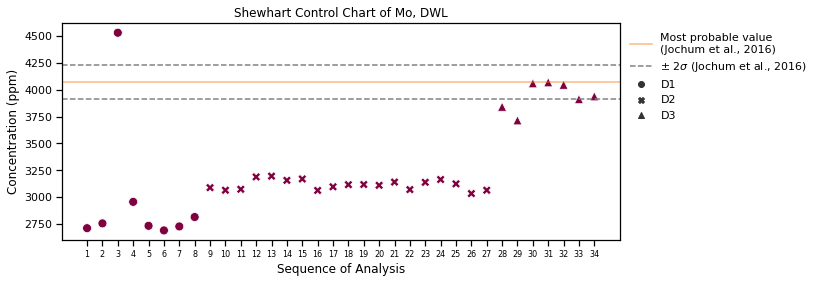

In [4]:
# Part 1 Task 3: Mo shewhart
digestion_markers = {'D1': 'o', 'D2': 'X', 'D3': '^'}
plt.figure(figsize=(10, 4))
sns.set_context('notebook')
el ='Mo'

# scatter plot
sns.scatterplot(data=BHVO2_DWL, x="Code", y=el,color='xkcd:wine',
                style="Digestion", 
                markers=digestion_markers,
                s=80,
                legend='full')

plt.axhline(Jochum["Measurement"].loc[el], c='xkcd:orange',alpha=0.5,
            lw=1.5, label="Most probable value\n(Jochum et al., 2016)")
plt.axhline(Jochum["Measurement"].loc[el] - Jochum["Uncertainty"].loc[el], c="grey", ls="--",label=r"$\pm$ 2$\sigma$ (Jochum et al., 2016)")
plt.axhline(Jochum["Measurement"].loc[el] + Jochum["Uncertainty"].loc[el], c="grey", ls="--")

plt.xticks(np.arange(len(BHVO2_DWL)),np.arange(1,len(BHVO2_DWL)+1), fontsize=8)
plt.xlabel("Sequence of Analysis")
plt.ylabel("Concentration (ppm)")
plt.title("Shewhart Control Chart of {el}, DWL".format(el=el))
plt.legend(loc="best")

# plt.savefig('/Users/ivan/Documents/MUN/EASC6510 Trace element geochem/Problem sets/PS1/P1_output_table/P1T3_Shewart_{el}.jpg'.format(el=el), dpi=300, bbox_inches='tight')
plt.show()


,Analysis,Mo
0,1,2710.221022
1,2,2755.015304
2,3,4531.827173
3,4,2955.469443
4,5,2732.309056
5,6,2689.389395
6,7,2726.498281
7,8,2814.242238


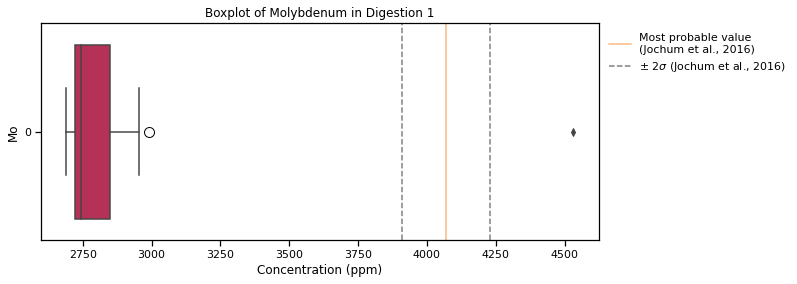

In [5]:
# Boxplot for Mo, DWL digestion 1
el = "Mo"
BHVO2_DWL_Mo = BHVO2.loc[(BHVO2["Digestion"] == 'D1') & (BHVO2["Company"] == "DWL")][["Analysis",el]]

display(BHVO2_DWL_Mo)
plt.figure(figsize=(10,4))
sns.boxplot(data=BHVO2_DWL_Mo[el], orient='h',palette='rocket',
            showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

plt.axvline(Jochum["Measurement"].loc[el], c='xkcd:orange',alpha=0.5,
            lw=1.5, label="Most probable value\n(Jochum et al., 2016)")
plt.axvline(Jochum["Measurement"].loc[el] - Jochum["Uncertainty"].loc[el], c="grey", ls="--",label=r"$\pm$ 2$\sigma$ (Jochum et al., 2016)")
plt.axvline(Jochum["Measurement"].loc[el] + Jochum["Uncertainty"].loc[el], c="grey", ls="--")

plt.ylabel(el)
plt.xticks(None)

plt.xlabel("Concentration (ppm)")
plt.title("Boxplot of Molybdenum in Digestion 1")
plt.legend(loc='best')

# plt.savefig('/Users/ivan/Documents/MUN/EASC6510 Trace element geochem/Problem sets/PS1/P1_output_table/P1T3_Boxplot_{el}.jpg'.format(el=el), dpi=300, bbox_inches='tight')
plt.show()

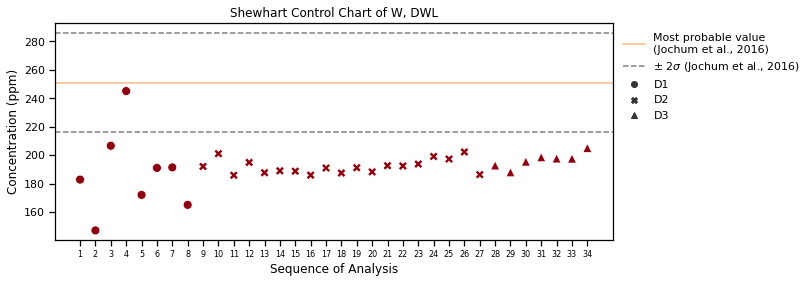

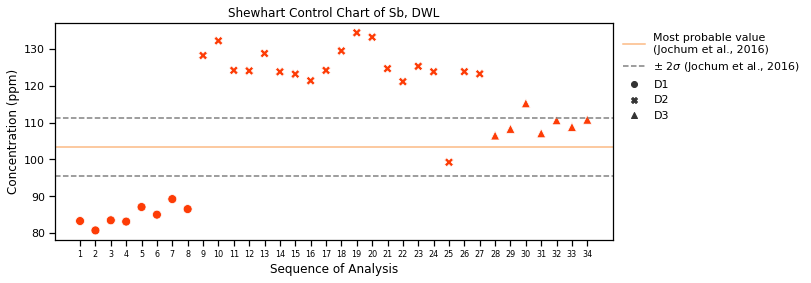

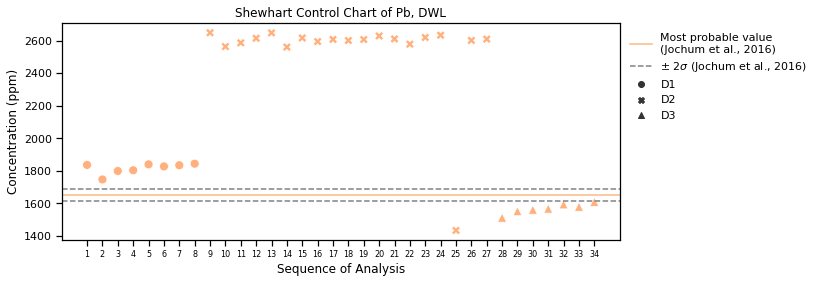

In [6]:
# Part 1 Task 4: W, Sb, Pb shewhart
digestion_markers = {'D1': 'o', 'D2': 'X', 'D3': '^'}
sns.set_context('notebook')
elements = ["W","Sb","Pb"]
colors = ['xkcd:crimson','xkcd:red orange','xkcd:peach']

sns.set_context('notebook')


for n, (el,c) in enumerate(zip(elements,colors)):
    fig = plt.figure(figsize=(10,4))



    sns.scatterplot(data=BHVO2[BHVO2['Company'] == 'DWL'], x=np.arange(len(BHVO2[BHVO2['Company'] == 'DWL'])), y=el,color=c,
                    style="Digestion", 
                    markers=digestion_markers,
                    s=80,
                    legend='full')

    plt.axhline(Jochum["Measurement"].loc[el], c='xkcd:orange',alpha=0.5,
                lw=1.5, label="Most probable value\n(Jochum et al., 2016)")
    plt.axhline(Jochum["Measurement"].loc[el] - Jochum["Uncertainty"].loc[el], c="grey", ls="--",label=r"$\pm$ 2$\sigma$ (Jochum et al., 2016)")
    plt.axhline(Jochum["Measurement"].loc[el] + Jochum["Uncertainty"].loc[el], c="grey", ls="--")

    plt.xticks(np.arange(len(BHVO2[BHVO2['Company'] == 'DWL'])),np.arange(1,len(BHVO2[BHVO2['Company'] == 'DWL'])+1), fontsize=8)
    plt.xlabel("Sequence of Analysis")
    plt.ylabel("Concentration (ppm)")
    plt.title("Shewhart Control Chart of {el}, DWL".format(el=el))
    # if el == elements[0]:
    plt.legend(loc='best')
    # else:
    #     plt.legend([],[])

    # plt.savefig('/Users/ivan/Documents/MUN/EASC6510 Trace element geochem/Problem sets/PS1/P1_output_table/P1T4_Shewart_{el}.jpg'.format(el=el), dpi=300, bbox_inches='tight')
plt.show()


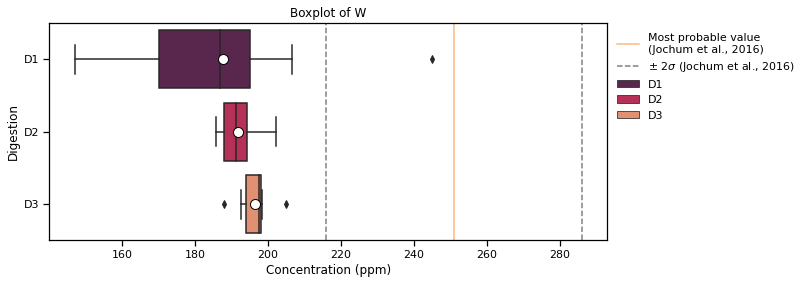

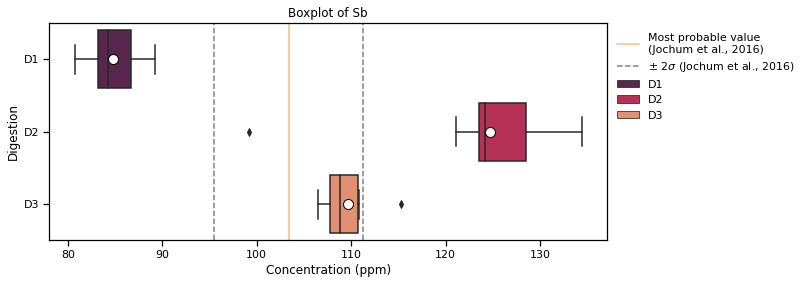

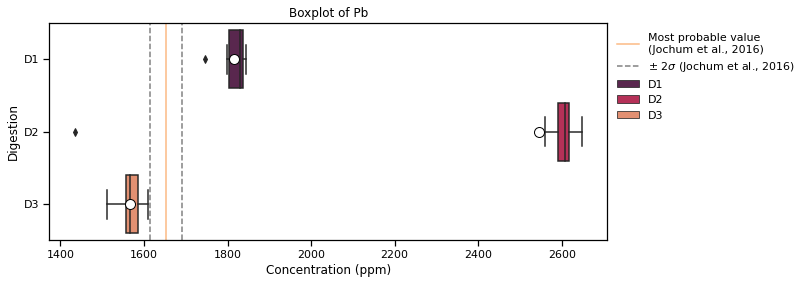

In [7]:
# Boxplot for W, Sb, Pb
elements = ["W","Sb","Pb"]
colors = ['xkcd:crimson','xkcd:red orange','xkcd:peach']

sns.set_context('notebook')


# loop over elements
for n, el in enumerate(elements):

    fig = plt.figure(figsize=(10,4))

    bp = sns.boxplot(data=BHVO2_DWL, y="Digestion", x=el, # plot boxplot of element
                dodge=False,hue="Digestion", palette='rocket',
                orient='h',whis=1.5,
            showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

    plt.axvline(Jochum["Measurement"].loc[el], c='xkcd:orange',alpha=0.5,
                lw=1.5, label="Most probable value\n(Jochum et al., 2016)")
    plt.axvline(Jochum["Measurement"].loc[el] - Jochum["Uncertainty"].loc[el], c="grey", ls="--",label=r"$\pm$ 2$\sigma$ (Jochum et al., 2016)")
    plt.axvline(Jochum["Measurement"].loc[el] + Jochum["Uncertainty"].loc[el], c="grey", ls="--")

    plt.xlabel("Concentration (ppm)")
    plt.title("Boxplot of {el}".format(el=el))
    # if el == elements[0]:
    plt.legend(loc='best')
    # else:
    #     plt.legend([],[])



    # plt.savefig('/Users/ivan/Documents/MUN/EASC6510 Trace element geochem/Problem sets/PS1/P1_output_table/P1T4_Boxplot_{el}.jpg'.format(el=el), dpi=300, bbox_inches='tight')
plt.show()

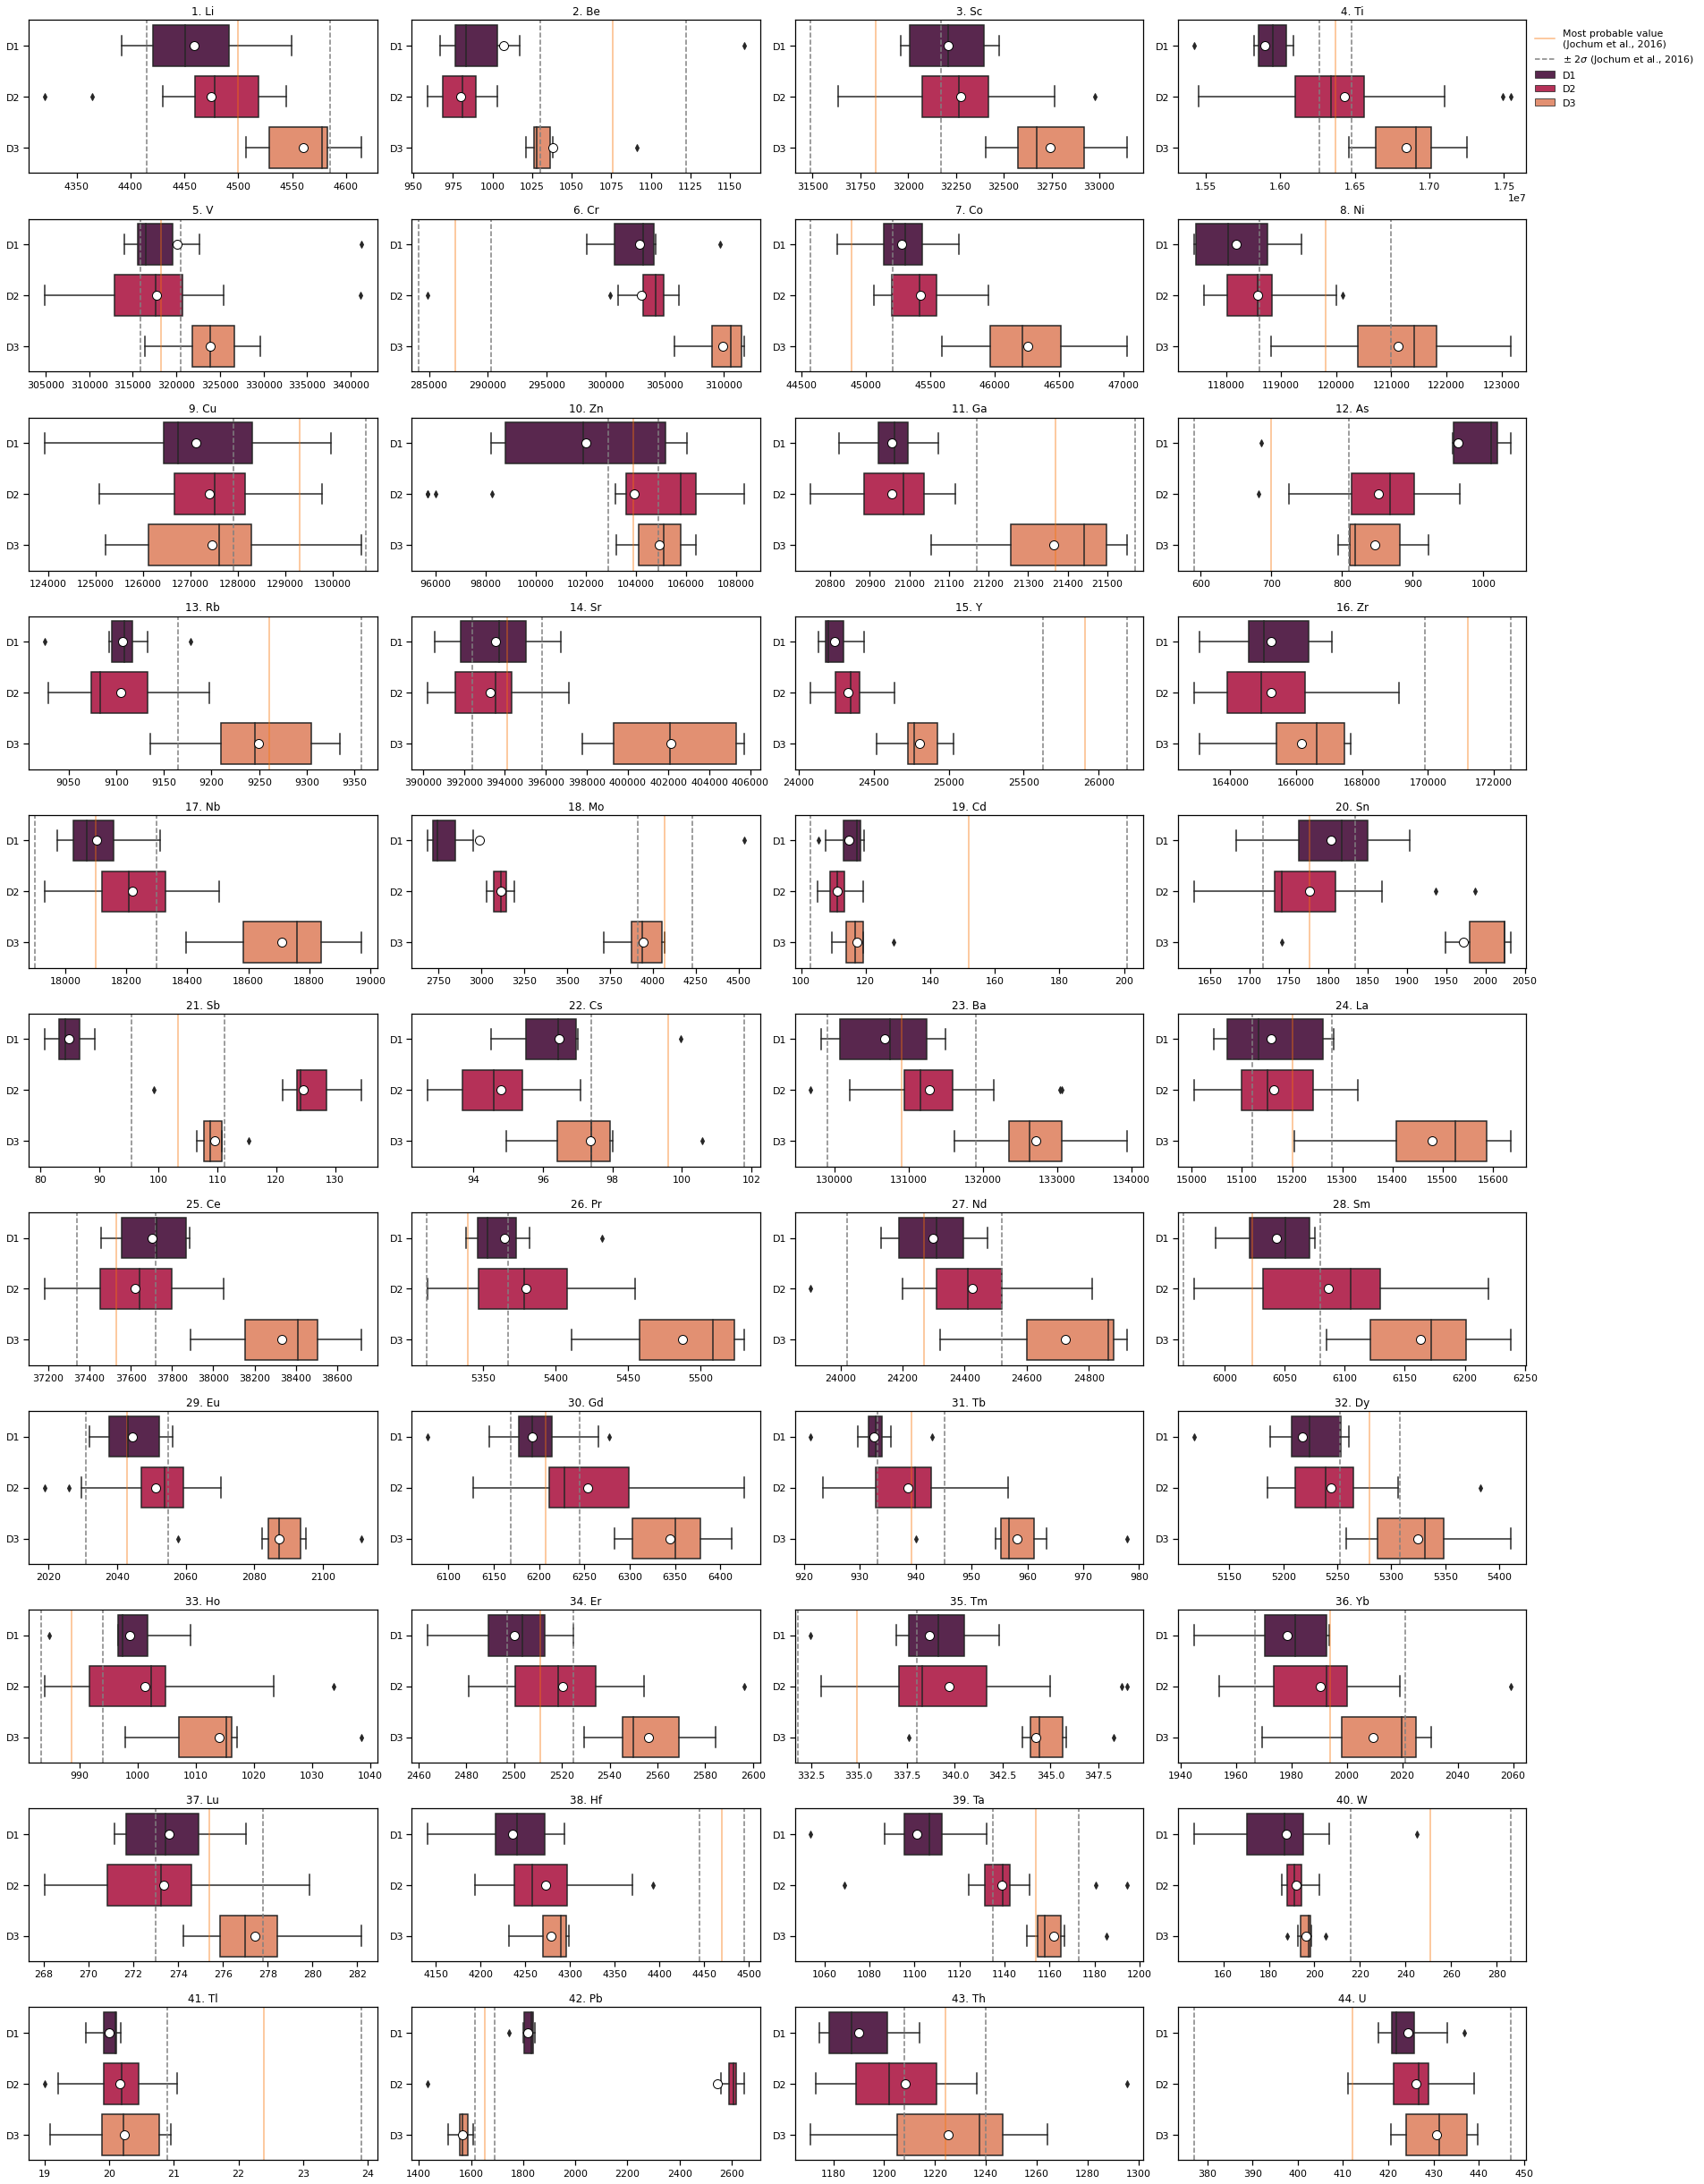

In [8]:
# Appendix 2: Boxplot for all elements, DWL
elements = [el for el in BHVO2_DWL.columns if el in pyrolite.geochem.parse.common_elements()]

# seaborn plot config
sns.set_context('notebook')
fig = plt.figure(figsize=(30,44))
plt.subplots_adjust(hspace=0.3,wspace =0.1)
ncols = 4
nrows = len(elements) // ncols + (len(elements) % ncols > 0)

# loop over elements
for n, el in enumerate(elements):

    ax = plt.subplot(nrows, ncols, n+1) # access to subplot axis object

    bp = sns.boxplot(data=BHVO2_DWL, y="Digestion", x=el, # plot boxplot of element
                dodge=False,hue="Digestion", ax=ax, palette='rocket',
                orient='h',whis=1.5,
            showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

    # reference value and uncertainty of respective element
    plt.axvline(Jochum["Measurement"].loc[el], c='xkcd:orange',alpha=0.5,
            lw=1.5, label="Most probable value\n(Jochum et al., 2016)")
    plt.axvline(Jochum["Measurement"].loc[el] - Jochum["Uncertainty"].loc[el], c="grey", ls="--",label=r"$\pm$ 2$\sigma$ (Jochum et al., 2016)")
    plt.axvline(Jochum["Measurement"].loc[el] + Jochum["Uncertainty"].loc[el], c="grey", ls="--")
    
    # plot config
    plt.ylabel("")
    plt.xlabel("")
    plt.title("{0}. {1}".format(n+1,el))
    if el == elements[3]:
        ax.legend(loc='best')
    else:
        plt.legend([],[])

# save fig
# fig.savefig('/Users/ivan/Documents/MUN/EASC6510 Trace element geochem/Problem sets/PS1/P1_output_table/P1T4_DWL_Boxplots.jpg', dpi=300, bbox_inches='tight')

plt.show()

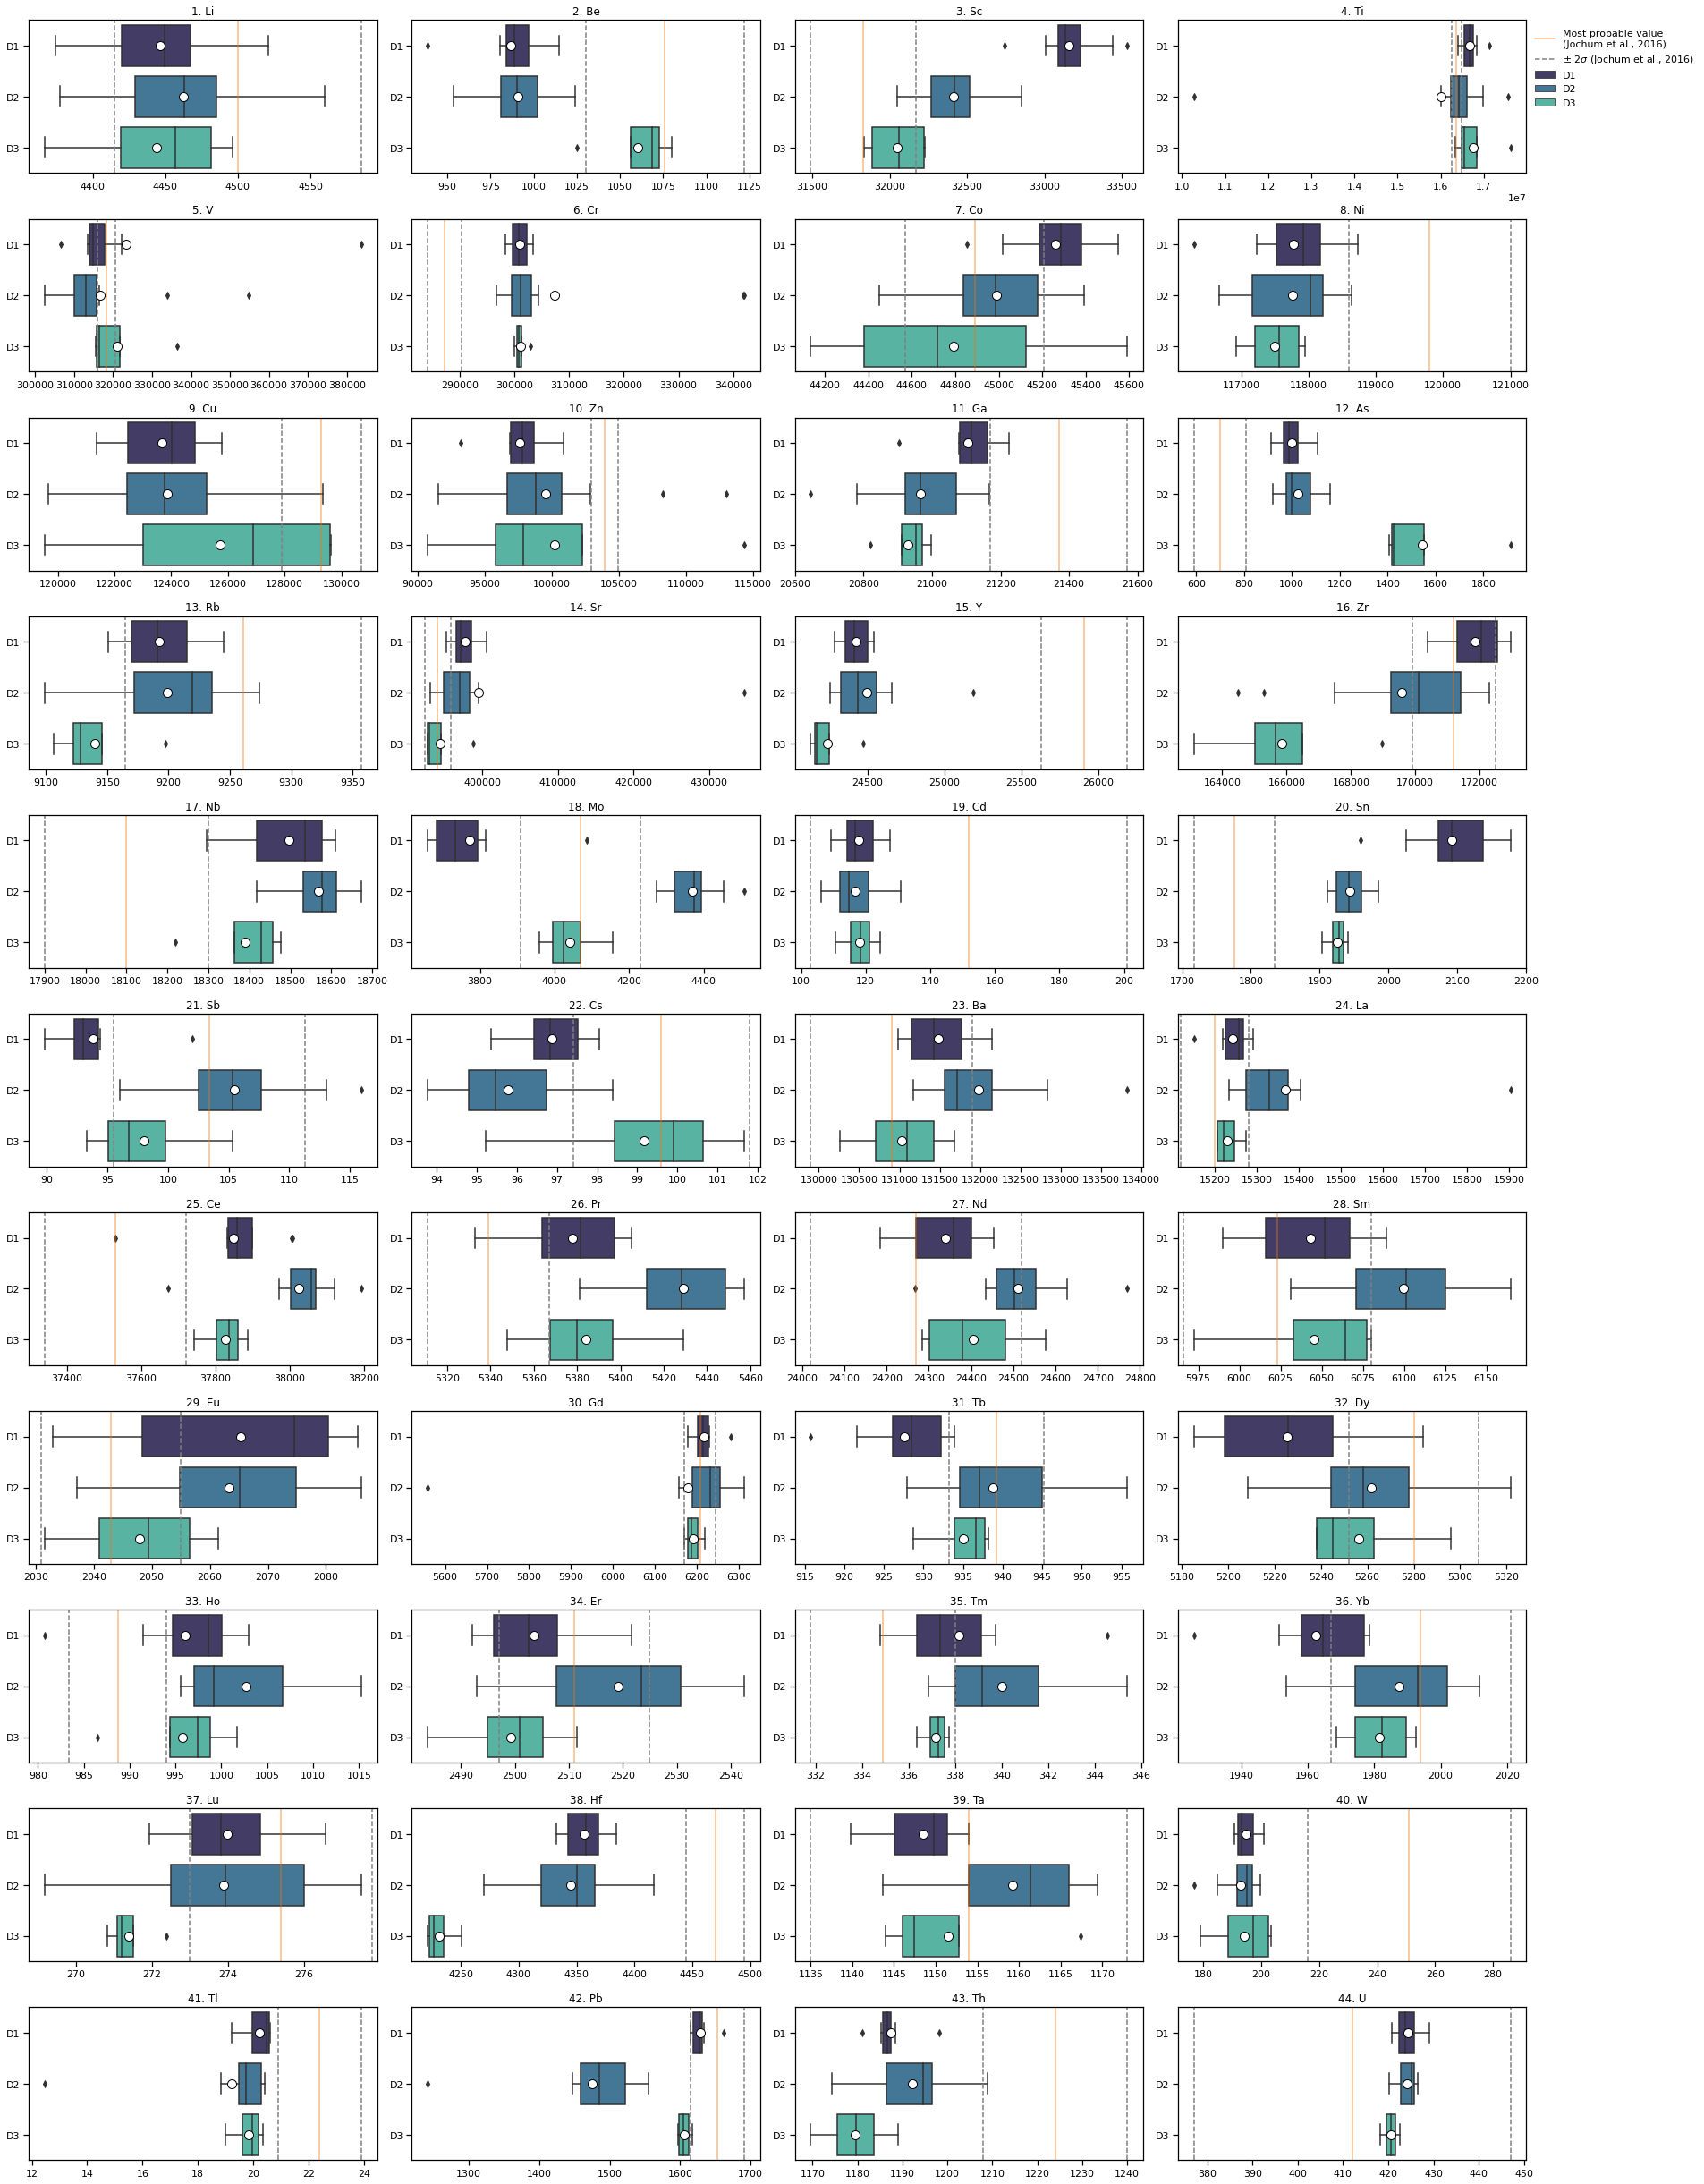

In [9]:
# Appendix 3: Boxplot for all elements, KML
elements = [el for el in BHVO2_KML.columns if el in pyrolite.geochem.parse.common_elements()]

# seaborn plot config
sns.set_context('notebook')
fig = plt.figure(figsize=(30,44))
plt.subplots_adjust(hspace=0.3,wspace =0.1)
ncols = 4
nrows = len(elements) // ncols + (len(elements) % ncols > 0)

# loop over elements
for n, el in enumerate(elements):

    ax = plt.subplot(nrows, ncols, n+1) # access to subplot axis object

    bp = sns.boxplot(data=BHVO2_KML, y="Digestion", x=el, # plot boxplot of element
                dodge=False,hue="Digestion", ax=ax, palette='mako',
                orient='h',whis=1.5,
            showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

    # reference value and uncertainty of respective element
    plt.axvline(Jochum["Measurement"].loc[el], c='xkcd:orange',alpha=0.5,
            lw=1.5, label="Most probable value\n(Jochum et al., 2016)")
    plt.axvline(Jochum["Measurement"].loc[el] - Jochum["Uncertainty"].loc[el], c="grey", ls="--",label=r"$\pm$ 2$\sigma$ (Jochum et al., 2016)")
    plt.axvline(Jochum["Measurement"].loc[el] + Jochum["Uncertainty"].loc[el], c="grey", ls="--")

    # plot config
    plt.ylabel("")
    plt.xlabel("")
    plt.title("{0}. {1}".format(n+1,el))
    if el == elements[3]:
        ax.legend(loc='best')
    else:
        plt.legend([],[])

# save fig
# fig.savefig('/Users/ivan/Documents/MUN/EASC6510 Trace element geochem/Problem sets/PS1/P1_output_table/P1T4_KML_Boxplots.jpg', dpi=300, bbox_inches='tight')

plt.show()

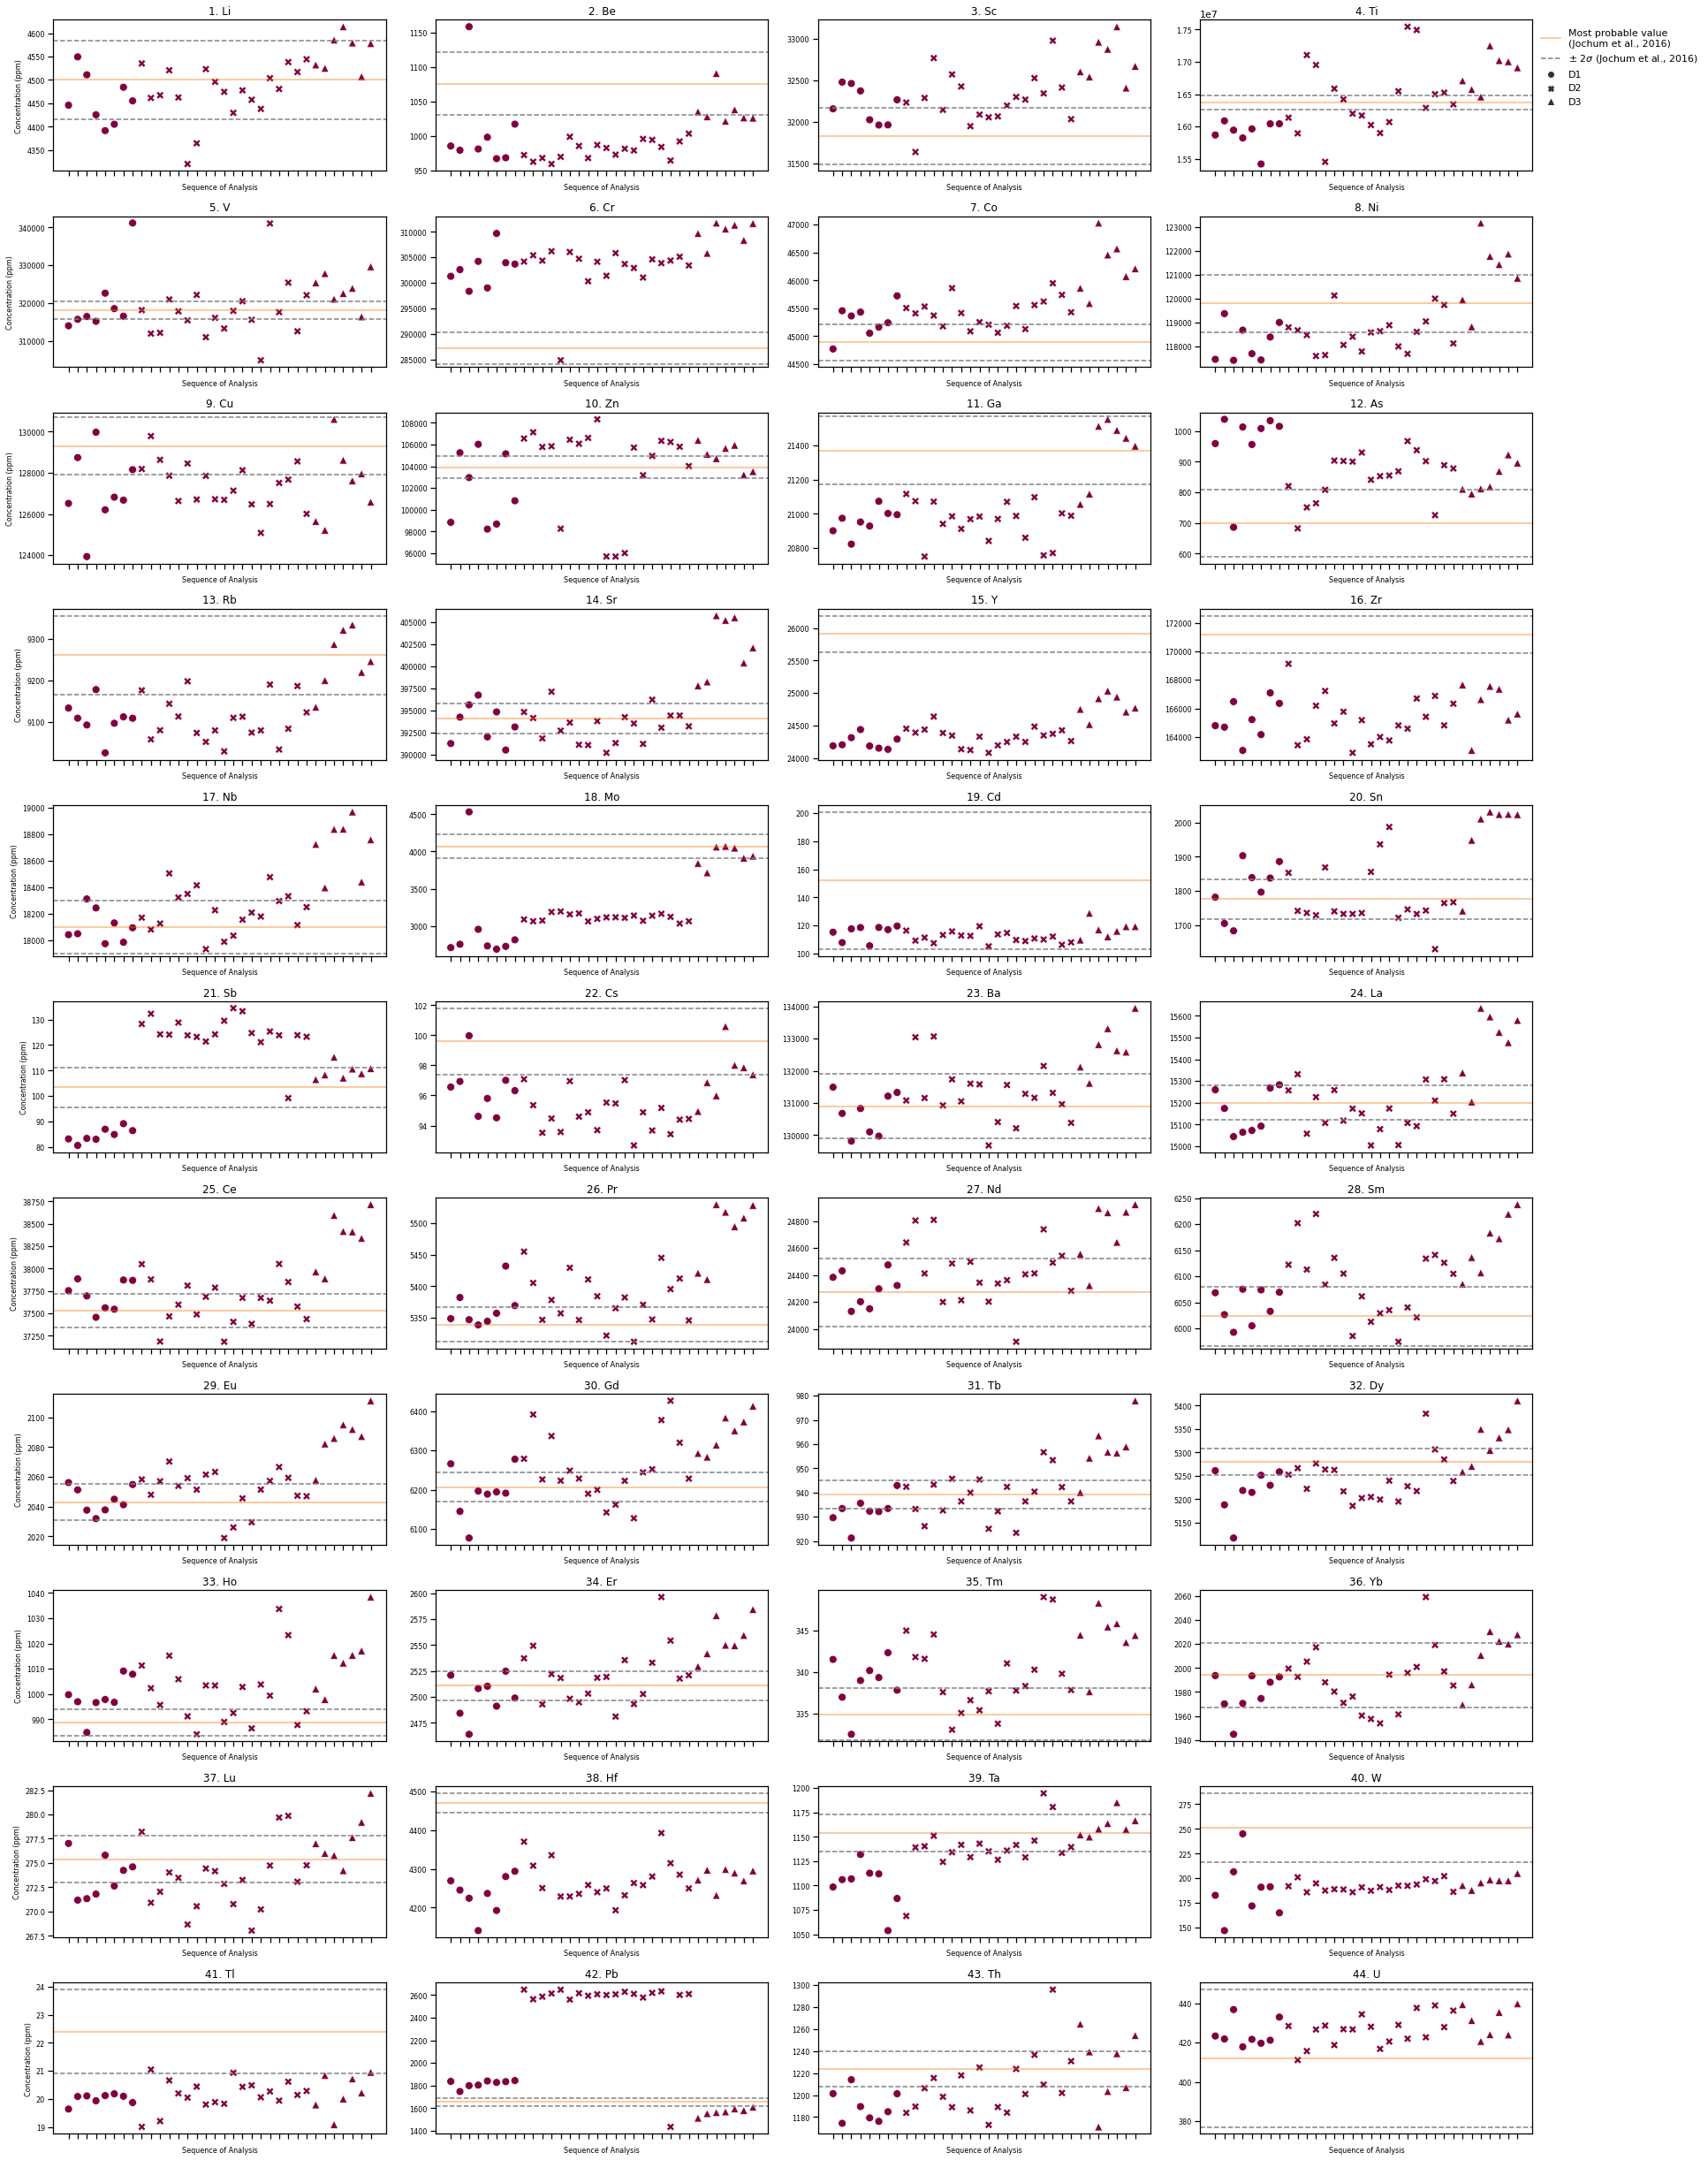

In [10]:
# Appendix 4: Shewhart for all elements DWL

elements = [
    el for el in BHVO2_DWL.columns if el in pyrolite.geochem.parse.common_elements()]

# seaborn plot config
sns.set_context('notebook')
fig = plt.figure(figsize=(30, 44))
plt.subplots_adjust(hspace=0.3, wspace=0.15)
ncols = 4
nrows = len(elements) // ncols + (len(elements) % ncols > 0)
digestion_markers = {'D1': 'o', 'D2': 'X', 'D3': '^'}

# loop over elements
for n, el in enumerate(elements):

    ax = plt.subplot(nrows, ncols, n+1)  # access to subplot axis object

    # plot scatter of digestion along analysis
    sns.scatterplot(ax=ax, data=BHVO2_DWL, x="Code", y=el, color='xkcd:wine',
                    style="Digestion",
                    markers=digestion_markers,
                    s=80,
                    legend='full')

    # Jochum (2016) most probable value and uncertainties
    plt.axhline(Jochum["Measurement"].loc[el], c='xkcd:orange', alpha=0.5,
                lw=1.5, label="Most probable value\n(Jochum et al., 2016)")
    plt.axhline(Jochum["Measurement"].loc[el] - Jochum["Uncertainty"].loc[el],
                c="grey", ls="--", label=r"$\pm$ 2$\sigma$ (Jochum et al., 2016)")
    plt.axhline(Jochum["Measurement"].loc[el] +
                Jochum["Uncertainty"].loc[el], c="grey", ls="--")
    
    # plot config
    plt.xticks(np.arange(len(BHVO2_DWL)), ["" for i in range(len(BHVO2_DWL))])
    plt.yticks(fontsize=8)
    plt.title("{0}. {1}".format(n+1, el))
    plt.xlabel("Sequence of Analysis", fontsize=8)
    if n % 4 == 0:
        plt.ylabel("Concentration (ppm)", fontsize=8)
    else:
        plt.ylabel("")

    if el == elements[3]:
        ax.legend(loc='best')
    else:
        plt.legend([], [])

# save fig
# plt.savefig('/Users/ivan/Documents/MUN/EASC6510 Trace element geochem/Problem sets/PS1/P1_output_table/Shewhart_all.jpg'.format(el=el),
#             dpi=300, bbox_inches='tight')
plt.show()
